In [2]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Title : Using heart disease data to determine likelyhood of risk of angina.

Introduction:
Angina, also known as chest pain, is caused by a lack of oxygen rich blood in heart muscle tissues (heart.org). Other symptoms of angina includes: fatigue, shortness of breath, indigestion, and muscle soreness in the neck, jaw, or back. However, a heart angina is not directly considered a disease, but rather an indicating signal of underlying health conditions such as heart disease or ischemia. For diseases such as MVD or coronary microvascular disease, women who reported angina symptoms are more likely to be diagnosed with the disease (heart.org). Information obtained from www.heart.org

Question: Is low maximum heart rate an indication of weakened heart muscle and possible disease?

We chose the Cleveland heart disease data ,which is a comma separated value file, which shows a collection of patients of various ages, sex, along with chest pain and risk level. Normally, the reported risk level ranges from 0-4. 0 being there is no risk associated and 1-4 being there is a certain level of heart disease risk along with the angina. 

Methods:
We could create a predictive test using the heart disease dataset and classify a patient’s heart disease risk level. We determined that the variables to be used are “age”, “max_heartrate”, and “exercise_induced_angina”. Our reasoning is that both “max_heartrate” and “exercise_induced_angina” are indicators of our heart muscle health, and as previously stated, weakened heart muscle tissue can result in heart disease development. We will be using a scatter plot along with classification methods to visualise and predict outcomes for each new patient's data. 


In [ ]:
Expected Outcome:


In [10]:
cleveland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(cleveland_data)<-c("age","sex","chest_pain","rest_bps","cholestrol_level","high_fbs?",
                            "rest_electrographics","max_heartrate","exercise_induced_angina","oldpeak","slope",
                            "colored_major_vessels","thal","risk_level")
                            #Note, generally 0=no issue and 1-4=problem
cleveland_data<-cleveland_data|>
                    select(age, sex, max_heartrate, exercise_induced_angina,risk_level)|>
                    mutate(exercise_induced_angina=case_when(exercise_induced_angina==0~"No",exercise_induced_angina==1~"Yes"))|>
                    mutate(sex=case_when(sex==0~"female",sex==1~"male"))
cleveland_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,max_heartrate,exercise_induced_angina,risk_level
<dbl>,<chr>,<dbl>,<chr>,<dbl>
67,male,108,Yes,2
67,male,129,Yes,1
37,male,187,No,0
⋮,⋮,⋮,⋮,⋮
57,male,115,Yes,3
57,female,174,No,1
38,male,173,No,0


[1] 149.606

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



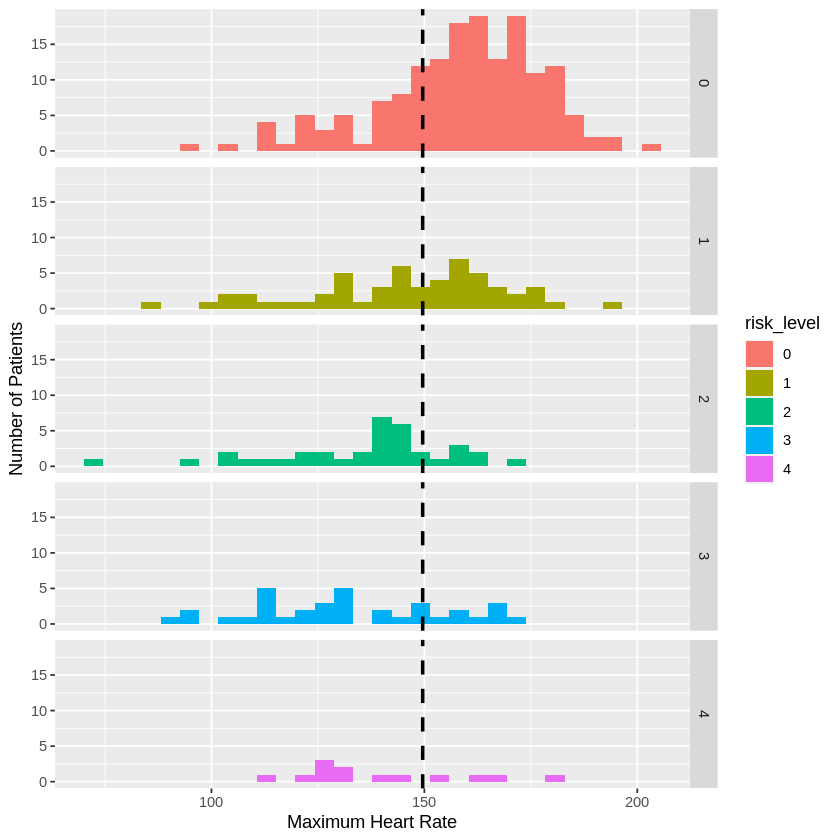

In [10]:
avg_heart_rate <- cleveland_data |>
                summarize(mean = mean(max_heartrate)) |>
                pull()

avg_heart_rate

angina_risk <- cleveland_data |>
                mutate(risk_level = as_factor(risk_level))|>
                ggplot(aes(max_heartrate, fill = risk_level)) +
                geom_histogram() +
                facet_grid(rows = vars(risk_level)) +
                geom_vline(xintercept = avg_heart_rate, linetype = "dashed", size = 1.0) + 
                labs(x = "Maximum Heart Rate", y = "Number of Patients")

angina_risk

Fig 1: As seen in the bar graphs above, a greater number of patients with high max heartrates have a lower risk level for heart disease.